Практическое задание
#### 1 .Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.
#### 2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow import keras
from keras import models
from keras import layers
import pandas as pd
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns

In [2]:
def evaluate_preds(true_values, pred_values, save=False, vis=True):
    """Оценка качества модели и график preds vs true"""
    if vis:
        print("R2:\t" + str(np.round(r2(true_values, pred_values), 5)) + "\n" +
              "RMSE:\t" + str(np.round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
              "MSE:\t" + str(np.round(mse(true_values, pred_values), 3)))
        
        plt.figure(figsize=(8,8))
        
        sns.scatterplot(x=pred_values, y=true_values)
        plt.plot([0, np.max(pred_values)], [0, np.max(true_values)], linestyle='--', color='black')  # диагональ, где true_values = pred_values
        
        plt.xlabel('Predicted values')
        plt.ylabel('True values')
        plt.title('True vs Predicted values')
        
        if save == True:
            plt.savefig(REPORTS_FILE_PATH + 'report.png')
        plt.show()

    return np.round(r2(true_values, pred_values), 5), np.round(np.sqrt(mse(true_values, pred_values)), 3), np.round(mse(true_values, pred_values), 3)

In [3]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:

model_test = models.Sequential()
model_test.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_test.add(layers.Dense(64, activation='relu'))
model_test.add(layers.Dense(1))

In [5]:
model_test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_test.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])

hist1=model_test.fit(X_train, y_train, epochs=5)

Epoch 1/5
11/11 [==============================] - 0s 700us/step - loss: 3557.8120 - mean_absolute_error: 50.9353
Epoch 2/5
11/11 [==============================] - 0s 600us/step - loss: 745.6036 - mean_absolute_error: 21.2889
Epoch 3/5
11/11 [==============================] - 0s 700us/step - loss: 315.1005 - mean_absolute_error: 14.3612
Epoch 4/5
11/11 [==============================] - 0s 700us/step - loss: 157.5376 - mean_absolute_error: 10.4175
Epoch 5/5
11/11 [==============================] - 0s 600us/step - loss: 115.6416 - mean_absolute_error: 7.8454


In [7]:
y_pred_test = model_test.predict(X_test)
y_pred_test.shape

(167, 1)

R2:	-0.01586
RMSE:	8.768
MSE:	76.878


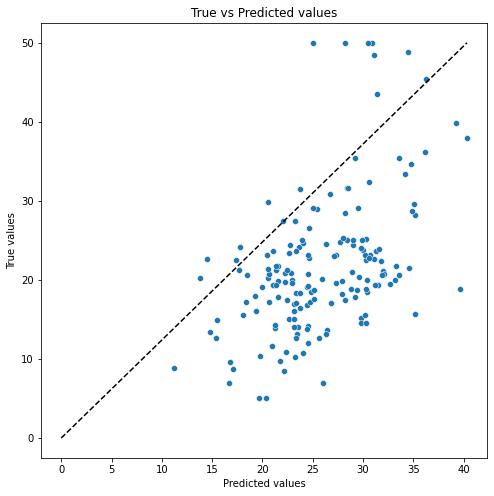

(-0.01586, 8.768, 76.878)

In [8]:
evaluate_preds(y_test, y_pred_test.copy().flatten() )

In [9]:
model_1 = models.Sequential()
model_1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(1))

model_2 = models.Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(layers.Dense(1))

model_3 = models.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(1))

In [10]:
l = [2, 1, 5, 10]
i = 0

res_list = []

for model in [model_1, model_2, model_3, model_4]:

  res = {}

  model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


  res['l'] = l[i]
  i += 1
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [11]:
pprint(res_list)

[{'l': 2, 'mse': 89.60209, 'r2': -0.18398, 'rmse': 9.46584},
 {'l': 1, 'mse': 233.24009, 'r2': -2.08199, 'rmse': 15.2722},
 {'l': 5, 'mse': 57.27827, 'r2': 0.24314, 'rmse': 7.56824},
 {'l': 10, 'mse': 56.21996, 'r2': 0.25712, 'rmse': 7.498}]


In [12]:
res_list = []

for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:

  res = {}

  model_n = models.Sequential()
  model_n.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
  model_n.add(layers.Dense(n, activation='relu'))
  model_n.add(layers.Dense(1))

  model_n.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_n.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_n.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


  res['n'] = n
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [13]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:

  res = {}

  model_o = models.Sequential()
  model_o.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
  model_o.add(layers.Dense(1024, activation='relu'))
  model_o.add(layers.Dense(1))

  model_o.compile(optimizer=opt,
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_o.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_o.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
  #print(y_pred_test)

  res['o'] = opt
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [14]:
pprint(res_list)

[{'mse': 65.94273, 'o': 'adam', 'r2': 0.12865, 'rmse': 8.12051},
 {'mse': 57.39946, 'o': 'RMSprop', 'r2': 0.24154, 'rmse': 7.57624},
 {'mse': 49.55974, 'o': 'Ftrl', 'r2': 0.34513, 'rmse': 7.03987},
 {'mse': 84.17405, 'o': 'Nadam', 'r2': -0.11226, 'rmse': 9.17464},
 {'mse': 59.52821, 'o': 'Adamax', 'r2': 0.21341, 'rmse': 7.71545}]


In [15]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
  for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    for metrics in ['mean_absolute_error', 'mean_squared_error']:
      for loss in [tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanAbsoluteError()]:
        model_1 = models.Sequential()
        model_1.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_1.add(layers.Dense(n, activation='relu'))
        model_1.add(layers.Dense(1))

        model_2 = models.Sequential()
        model_2.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_2.add(layers.Dense(1))

        model_3 = models.Sequential()
        model_3.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(1))

        model_4 = models.Sequential()
        model_4.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(1))

        l = [2, 1, 5, 10]
        i = 0

        for model in [model_1, model_2, model_3, model_4]:

          res = {}

          model.compile(optimizer='adam',
                      loss=loss,
                      metrics=metrics)
          
          model.fit(X_train, y_train, epochs=5,
                      verbose = False)
          y_pred_test = model.predict(X_test)

          #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


          res['l'] = l[i]
          res['n'] = n
          res['opt'] = opt
          res['metrics'] = metrics
          res['loss'] = loss
          i += 1
          res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
          res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
          res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)


          res_list.append(res)

In [16]:
df = pd.DataFrame(res_list)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   l        960 non-null    int64  
 1   n        960 non-null    int64  
 2   opt      960 non-null    object 
 3   metrics  960 non-null    object 
 4   loss     960 non-null    object 
 5   r2       960 non-null    float64
 6   rmse     960 non-null    float64
 7   mse      960 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 60.1+ KB


In [20]:
df.sort_values(by='rmse').head(10)

,l,n,opt,metrics,loss,r2,rmse,mse
329,1,256,RMSprop,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.53963,5.90252,34.83979
933,1,1024,Adamax,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.53546,5.92923,35.15577
173,1,1024,adam,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.51225,6.07552,36.91191
913,1,512,Adamax,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.51116,6.08230,36.99433
729,1,512,Nadam,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.51083,6.08439,37.01979
565,1,2048,Ftrl,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.50216,6.13806,37.67576
721,1,512,Nadam,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.49566,6.17803,38.16801
761,1,2048,Nadam,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.49340,6.19185,38.33902
529,1,512,Ftrl,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.49008,6.21208,38.58991
185,1,2048,adam,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.48406,6.24865,39.04559


странно что более простая модель показывает наиболее лучший результат 